In [1]:
from hockey_rink import NHLRink, RinkImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px
from functools import reduce

brady = pd.read_csv("brady_indiv.csv")
brady_ice = pd.read_csv("brady_on_ice.csv")
power_forwards = pd.read_csv("power_forwards.csv")
power_forwards

,season,team,gp,g,a,pts,PIM,plus/minus,player
0,1983,VAN,56,16,15,31,57,0,Neely
1,1984,VAN,72,21,18,39,137,-26,Neely
2,1985,VAN,73,14,20,34,126,-30,Neely
3,1986,BOS,75,36,36,72,143,23,Neely
4,1987,BOS,69,42,27,69,175,30,Neely
...,...,...,...,...,...,...,...,...,...
87,2005,CAR,78,31,39,70,68,8,BrindAmour
88,2006,CAR,78,26,56,82,46,7,BrindAmour
89,2007,CAR,59,19,32,51,38,0,BrindAmour
90,2008,CAR,80,16,35,51,36,-23,BrindAmour


In [2]:
#create a ppg to better compare each player over time
power_forwards['ppg'] = round(power_forwards['PIM']/power_forwards['gp'], 2)
power_forwards.head(25)

,season,team,gp,g,a,pts,PIM,plus/minus,player,ppg
0,1983,VAN,56,16,15,31,57,0,Neely,1.02
1,1984,VAN,72,21,18,39,137,-26,Neely,1.90
2,1985,VAN,73,14,20,34,126,-30,Neely,1.73
3,1986,BOS,75,36,36,72,143,23,Neely,1.91
4,1987,BOS,69,42,27,69,175,30,Neely,2.54
5,1988,BOS,74,37,38,75,190,14,Neely,2.57
6,1989,BOS,76,55,37,92,117,10,Neely,1.54
7,1990,BOS,69,51,40,91,98,26,Neely,1.42
8,1991,BOS,9,9,3,12,16,9,Neely,1.78
9,1992,BOS,14,11,7,18,25,4,Neely,1.79


In [3]:
#how many seasons did each person play?
power_forwards['player'].value_counts()

Messier       25
Shanahan      21
BrindAmour    20
Neely         13
Lindros       13
Name: player, dtype: int64

In [4]:
#in order to compare each player at roughly the same age, I am adding the season number
#Neely
neely = power_forwards.query('player == "Neely"')
neely_pim = neely[['player', 'season', 'PIM', 'ppg']]
neely_pim['season_number'] =neely_pim.index + 1
neely_pim


C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\1453988828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neely_pim['season_number'] =neely_pim.index + 1


,player,season,PIM,ppg,season_number
0,Neely,1983,57,1.02,1
1,Neely,1984,137,1.90,2
2,Neely,1985,126,1.73,3
3,Neely,1986,143,1.91,4
4,Neely,1987,175,2.54,5
5,Neely,1988,190,2.57,6
6,Neely,1989,117,1.54,7
7,Neely,1990,98,1.42,8
8,Neely,1991,16,1.78,9
9,Neely,1992,25,1.79,10


In [5]:
#Messier
messier = power_forwards.query('player == "Messier"')
messier_pim = messier[['player', 'season', 'PIM', 'ppg']]
messier_pim.reset_index(drop=False, inplace=True)
messier_pim['season_number'] =messier_pim.index + 1
messier_pim

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\2018041434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messier_pim['season_number'] =messier_pim.index + 1


,index,player,season,PIM,ppg,season_number
0,26,Messier,1979,120,1.60,1
1,27,Messier,1980,102,1.42,2
2,28,Messier,1981,119,1.53,3
3,29,Messier,1982,72,0.94,4
4,30,Messier,1983,165,2.26,5
5,31,Messier,1984,57,1.04,6
6,32,Messier,1985,70,1.11,7
7,33,Messier,1986,73,0.95,8
8,34,Messier,1987,103,1.34,9
9,35,Messier,1988,130,1.81,10


In [6]:
#Lindros
lindros = power_forwards.query('player == "Lindros"')
lindros_pim = lindros[['player', 'season', 'PIM', 'ppg']]
lindros_pim.reset_index(drop=False, inplace=True)
lindros_pim['season_number'] =lindros_pim.index + 1
lindros_pim

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\3039978337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lindros_pim['season_number'] =lindros_pim.index + 1


,index,player,season,PIM,ppg,season_number
0,13,Lindros,1992,147,2.41,1
1,14,Lindros,1993,103,1.58,2
2,15,Lindros,1994,60,1.30,3
3,16,Lindros,1995,163,2.23,4
4,17,Lindros,1996,136,2.62,5
5,18,Lindros,1997,134,2.13,6
6,19,Lindros,1998,120,1.69,7
7,20,Lindros,1999,83,1.51,8
8,21,Lindros,2001,138,1.92,9
9,22,Lindros,2002,141,1.74,10


In [7]:
#Shanahan
shanny = power_forwards.query('player == "Shanahan"')
shanny_pim = shanny[['player', 'season', 'PIM', 'ppg']]
shanny_pim.reset_index(drop=False, inplace=True)
shanny_pim['season_number'] =shanny_pim.index + 1
shanny_pim

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\1959131007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanny_pim['season_number'] =shanny_pim.index + 1


,index,player,season,PIM,ppg,season_number
0,51,Shanahan,1987,131,2.02,1
1,52,Shanahan,1989,115,1.69,2
2,53,Shanahan,1990,137,1.88,3
3,54,Shanahan,1991,141,1.88,4
4,55,Shanahan,1992,171,2.14,5
5,56,Shanahan,1993,174,2.45,6
6,57,Shanahan,1994,211,2.60,7
7,58,Shanahan,1995,136,3.02,8
8,59,Shanahan,1996,256,1.63,9
9,60,Shanahan,1997,131,1.66,10


In [8]:
#Brind'Amour
rod = power_forwards.query('player == "BrindAmour"')
rod_pim = rod[['player', 'season', 'PIM', 'ppg']]
rod_pim.reset_index(drop=False, inplace=True)
rod_pim['season_number'] =rod_pim.index + 1
rod_pim

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\1693247315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rod_pim['season_number'] =rod_pim.index + 1


,index,player,season,PIM,ppg,season_number
0,72,BrindAmour,1989,46,0.58,1
1,73,BrindAmour,1990,93,1.19,2
2,74,BrindAmour,1991,100,1.25,3
3,75,BrindAmour,1992,89,1.10,4
4,76,BrindAmour,1993,85,1.01,5
5,77,BrindAmour,1994,33,0.69,6
6,78,BrindAmour,1995,110,1.34,7
7,79,BrindAmour,1996,41,0.50,8
8,80,BrindAmour,1997,54,0.66,9
9,81,BrindAmour,1998,47,0.57,10


In [9]:
#Joining all of the data in prep for visualization
pims_df = pd.concat([neely_pim, messier_pim, lindros_pim,shanny_pim,rod_pim ], ignore_index=True)
pims_df=pims_df.pivot(index='season_number', columns='player', values='ppg')
pims_df

player,BrindAmour,Lindros,Messier,Neely,Shanahan
season_number,,,,,
1,0.58,2.41,1.60,1.02,2.02
2,1.19,1.58,1.42,1.90,1.69
3,1.25,1.30,1.53,1.73,1.88
4,1.10,2.23,0.94,1.91,1.88
5,1.01,2.62,2.26,2.54,2.14
6,0.69,2.13,1.04,2.57,2.45
7,1.34,1.69,1.11,1.54,2.60
8,0.50,1.51,0.95,1.42,3.02
9,0.66,1.92,1.34,1.78,1.63


In [10]:
pims_df.reset_index(drop=False, inplace=True)
pims_df

player,season_number,BrindAmour,Lindros,Messier,Neely,Shanahan
0,1,0.58,2.41,1.60,1.02,2.02
1,2,1.19,1.58,1.42,1.90,1.69
2,3,1.25,1.30,1.53,1.73,1.88
3,4,1.10,2.23,0.94,1.91,1.88
4,5,1.01,2.62,2.26,2.54,2.14
5,6,0.69,2.13,1.04,2.57,2.45
6,7,1.34,1.69,1.11,1.54,2.60
7,8,0.50,1.51,0.95,1.42,3.02
8,9,0.66,1.92,1.34,1.78,1.63
9,10,0.57,1.74,1.81,1.79,1.66


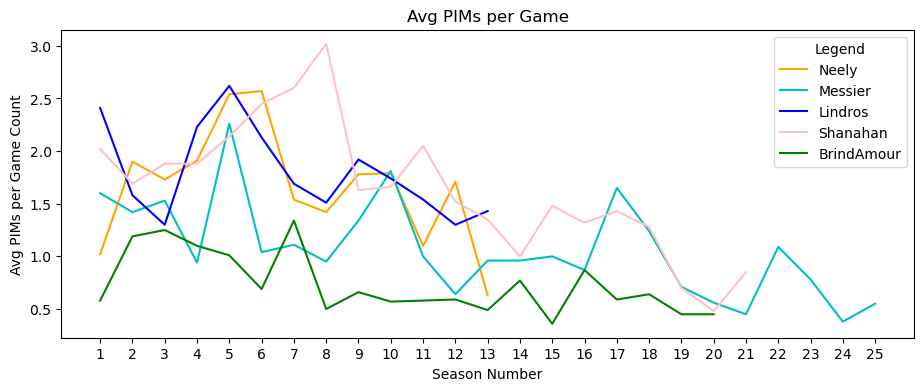

In [11]:
# Define data values - PPG
Neely =  pims_df['Neely']
Messier =  pims_df['Messier']
Lindros =  pims_df['Lindros']
Shanahan =  pims_df['Shanahan']
BrindAmour =  pims_df['BrindAmour']
season_number =  pims_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed

# Plot 'TOI' on the first y-axis
plt.plot(season_number, Neely, 'orange', label='Neely')
plt.plot(season_number, Messier, 'c', label='Messier')
plt.plot(season_number, Lindros, 'blue', label = 'Lindros')
plt.plot(season_number, Shanahan, 'pink', label = 'Shanahan')
plt.plot(season_number, BrindAmour, 'green', label = 'BrindAmour')

# Set legend and title
legend_labels = ['Neely', 'Messier', 'Lindros', 'Shanahan', 'BrindAmour']

plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Number')
plt.ylabel('Avg PIMs per Game Count')
plt.title('Avg PIMs per Game')
plt.xticks(season_number, rotation=360)


plt.show()

In [12]:
#pims df of only 3 players
pims_df2 = pd.concat([ messier_pim, shanny_pim,rod_pim ], ignore_index=True)
pims_df2=pims_df2.pivot(index='season', columns='player', values='ppg')
pims_df2

player,BrindAmour,Messier,Shanahan
season,,,
1979,NaN,1.60,NaN
1980,NaN,1.42,NaN
1981,NaN,1.53,NaN
1982,NaN,0.94,NaN
1983,NaN,2.26,NaN
1984,NaN,1.04,NaN
1985,NaN,1.11,NaN
1986,NaN,0.95,NaN
1987,NaN,1.34,2.02


In [13]:
pims_df2.reset_index(drop=False, inplace=True)
pims_df2

player,season,BrindAmour,Messier,Shanahan
0,1979,NaN,1.60,NaN
1,1980,NaN,1.42,NaN
2,1981,NaN,1.53,NaN
3,1982,NaN,0.94,NaN
4,1983,NaN,2.26,NaN
5,1984,NaN,1.04,NaN
6,1985,NaN,1.11,NaN
7,1986,NaN,0.95,NaN
8,1987,NaN,1.34,2.02
9,1988,NaN,1.81,NaN


In [14]:
pims_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      31 non-null     int64  
 1   BrindAmour  20 non-null     float64
 2   Messier     25 non-null     float64
 3   Shanahan    21 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [15]:
#zooming in to see what happens after the new instigator rule was introduced in 1992
mid_90s = pims_df2.query('season >= 1992 & season <=2000')
mid_90s

player,season,BrindAmour,Messier,Shanahan
13,1992,1.10,0.96,2.14
14,1993,1.01,1.00,2.45
15,1994,0.69,0.87,2.60
16,1995,1.34,1.65,3.02
17,1996,0.50,1.24,1.63
18,1997,0.66,0.71,1.66
19,1998,0.57,0.56,2.05
20,1999,0.58,0.45,1.52
21,2000,0.59,1.09,1.35


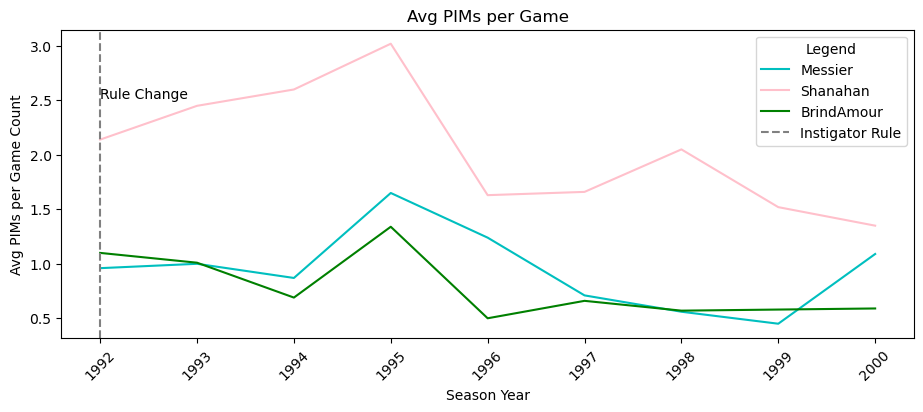

In [16]:
# Define data values - PPG
Messier =  mid_90s['Messier']
Shanahan =  mid_90s['Shanahan']
BrindAmour =  mid_90s['BrindAmour']
season =  mid_90s['season']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, Messier, 'c', label='Messier')
plt.plot(season, Shanahan, 'pink', label = 'Shanahan')
plt.plot(season, BrindAmour, 'green', label = 'BrindAmour')

# Add vertical reference lines and label
plt.axvline(x=1992, color='gray', linestyle='--')
plt.text(1992, 0.8 * ax1.get_ylim()[1], 'Rule Change', color='black', rotation=360)


# Set legend and title
legend_labels = [ 'Messier', 'Shanahan', 'BrindAmour']
legend_labels += ['Instigator Rule']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Avg PIMs per Game Count')
plt.title('Avg PIMs per Game')
plt.xticks(season, rotation=45)


plt.show()

In [17]:
#taking a look at a current player who fits the power forward archetype
bt_forward = brady[['Season', 'GP','Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct']]
bt_forward['Season'] = bt_forward['Season'].astype(str).str[:4]
bt_forward

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_12136\2109038479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_forward['Season'] = bt_forward['Season'].astype(str).str[:4]


,Season,GP,Hits,Goals,Total Penalties,Minor,Major,Misconduct
0,2018,71,174,22,28,24,3,1
1,2019,71,303,21,35,28,4,3
2,2020,56,248,17,24,17,7,0
3,2021,79,270,30,43,36,5,2
4,2022,82,242,35,39,28,8,3


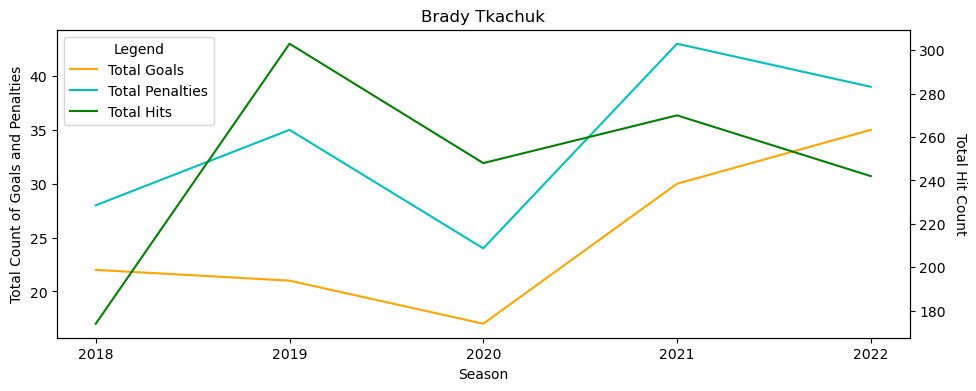

In [18]:
#visualize Tkachuk's stats
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed

# Define data values
hits = bt_forward['Hits']
goals = bt_forward['Goals']
pims = bt_forward['Total Penalties']
season = bt_forward['Season']


# Plot 'TOI' on the first y-axis
line1 = ax1.plot(season, goals, 'orange', label='Total Goals')
line2 = ax1.plot(season, pims, 'c', label='Total Penalties')
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Count of Goals and Penalties')
ax1.set_title('Brady Tkachuk')

# Create the second y-axis for 'shifts'
ax2 = ax1.twinx()

# Plot 'shifts' on the second y-axis
line3 = ax2.plot(season, hits, 'green', label='Total Hits')
ax2.set_ylabel('Total Hits)')
# Rotate the label of the second y-axis
ax2.set_ylabel('Total Hit Count', rotation=270, labelpad=15)

# Combine legends from both axes
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)


# Combine legend handles and labels
handles = line1 + line2 + line3 
labels = [line.get_label() for line in line1] + [line.get_label() for line in line2] + [line.get_label() for line in line3]

# Set legend and title
ax1.legend(handles, labels, title='Legend')


# Display the plot
plt.show()

In [201]:
#what is his mean goal count
brady['Goals'].mean()

25.0

In [19]:
#Looking at all of the other players; in this case I have changed up the ppg to total penalties
lucic = pd.read_csv("lucic_2.csv")
lucic['Season'] = lucic['Season'].astype(str).str[:4]
lucic=lucic.groupby('Season').sum().reset_index()
lucic['ppg'] = round(lucic['Total Penalties']/lucic['GP'],2)
lucic['player']= "Lucic"

ovi = pd.read_csv("Ovi.csv")
ovi['Season'] = ovi['Season'].astype(str).str[:4]
ovi = ovi.groupby('Season').sum().reset_index()
ovi['ppg'] = round(ovi['Total Penalties']/ovi['GP'],2)
ovi['player'] = "Ovechkin"

miller = pd.read_csv("Miller.csv")
miller['Season'] = miller['Season'].astype(str).str[:4]
miller = miller.groupby('Season').sum().reset_index()
miller['ppg'] = round(miller['Total Penalties']/miller['GP'],2)
miller['player'] = "Miller"

meier = pd.read_csv("Timo.csv")
meier['Season'] = meier['Season'].astype(str).str[:4]
meier=meier.groupby('Season').sum().reset_index()
meier['ppg'] = round(meier['Total Penalties']/meier['GP'],2)
meier['player'] = "Meier"

barbashev = pd.read_csv("Barbashev.csv")
barbashev['Season'] = barbashev['Season'].astype(str).str[:4]
barbashev = barbashev.groupby('Season').sum().reset_index()
barbashev['ppg'] = round(barbashev['Total Penalties']/barbashev['GP'],2)
barbashev['player'] = "Barbashev"

pageau = pd.read_csv("JG.csv")
pageau['Season'] = pageau['Season'].astype(str).str[:4]
pageau = pageau.groupby('Season').sum().reset_index()
pageau['ppg'] = round(pageau['Total Penalties']/pageau['GP'],2)
pageau['player'] = "Pageau"

kuraly = pd.read_csv("Kuraly.csv")
kuraly['Season'] = kuraly['Season'].astype(str).str[:4]
kuraly = kuraly.groupby('Season').sum().reset_index()
kuraly['ppg'] = round(kuraly['Total Penalties']/kuraly['GP'],2)
kuraly['player'] = "Kuraly"

staal = pd.read_csv("Staal.csv")
staal['Season'] = staal['Season'].astype(str).str[:4]
staal = staal.groupby('Season').sum().reset_index()
staal['ppg'] = round(staal['Total Penalties']/staal['GP'],2)
staal['player'] = "Staal"

In [267]:
#taking a quick look
meier

,Season,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,...,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,ppg,player
0,2016,34,424.100000,3,3,2,1,6,46.15,85,...,28,24,64,58,5,1,4,20.00,0.15,Meier
1,2017,81,1204.283333,21,15,5,10,36,59.02,210,...,40,48,105,142,48,71,75,48.63,0.25,Meier
2,2018,78,1323.416667,30,36,20,16,66,72.53,250,...,38,49,99,109,40,12,26,31.58,0.32,Meier
3,2019,70,1209.800000,22,27,15,12,49,80.33,199,...,31,39,155,106,38,12,25,32.43,0.24,Meier
4,2020,54,867.283333,12,19,10,9,31,68.89,155,...,25,22,75,63,24,8,20,28.57,0.20,Meier
5,2021,77,1475.333333,35,41,22,19,76,77.55,326,...,53,49,162,118,61,18,19,48.65,0.35,Meier
6,2022,78,1512.283333,40,26,17,9,66,118.42,328,...,65,58,154,127,37,21,36,40.38,0.26,Meier


In [268]:
#hits
lucic_df = lucic[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
lucic_df.reset_index(drop=False, inplace=True)
lucic_df['season_number'] =lucic_df.index + 1

ovi_df = ovi[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
ovi_df.reset_index(drop=False, inplace=True)
ovi_df['season_number'] =ovi_df.index + 1

miller_df = miller[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
miller_df.reset_index(drop=False, inplace=True)
miller_df['season_number'] =miller_df.index + 1

meier_df = meier[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
meier_df.reset_index(drop=False, inplace=True)
meier_df['season_number'] =meier_df.index + 1

barbashev_df = barbashev[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
barbashev_df.reset_index(drop=False, inplace=True)
barbashev_df['season_number'] =barbashev_df.index + 1

pageau_df = pageau[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
pageau_df.reset_index(drop=False, inplace=True)
pageau_df['season_number'] =pageau_df.index + 1

kuraly_df = kuraly[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
kuraly_df.reset_index(drop=False, inplace=True)
kuraly_df['season_number'] =kuraly_df.index + 1

staal_df = staal[['Season', 'Hits', 'Goals', 'Total Penalties', 'Minor', 'Major', 'Misconduct', 'player', 'ppg']]
staal_df.reset_index(drop=False, inplace=True)
staal_df['season_number'] =staal_df.index + 1

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_2108\3633857645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucic_df['season_number'] =lucic_df.index + 1
C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_2108\3633857645.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovi_df['season_number'] =ovi_df.index + 1
C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_2108\3633857645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [269]:
meier_df

,index,Season,Hits,Goals,Total Penalties,Minor,Major,Misconduct,player,ppg,season_number
0,0,2016,64,3,5,5,0,0,Meier,0.15,1
1,1,2017,105,21,20,18,1,1,Meier,0.25,2
2,2,2018,99,30,25,24,1,0,Meier,0.32,3
3,3,2019,155,22,17,16,0,1,Meier,0.24,4
4,4,2020,75,12,11,11,0,0,Meier,0.20,5
5,5,2021,162,35,27,27,0,0,Meier,0.35,6
6,6,2022,154,40,20,19,1,0,Meier,0.26,7


In [270]:
#joining all of the players hit counts
hits_df = pd.concat([ lucic_df, ovi_df, miller_df, meier_df, pageau_df, kuraly_df, barbashev_df, staal_df ], ignore_index=True)
hits_df = hits_df.pivot(index='season_number', columns='player', values='Hits')
hits_df

player,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
season_number,,,,,,,,
1,34.0,9.0,181.0,64.0,93.0,220.0,11.0,86.0
2,70.0,143.0,262.0,105.0,151.0,243.0,41.0,156.0
3,86.0,129.0,141.0,99.0,162.0,185.0,158.0,121.0
4,144.0,145.0,167.0,155.0,NaN,241.0,166.0,70.0
5,49.0,99.0,201.0,75.0,NaN,215.0,161.0,101.0
6,160.0,240.0,139.0,162.0,NaN,120.0,131.0,105.0
7,182.0,187.0,240.0,154.0,NaN,204.0,63.0,194.0
8,NaN,NaN,259.0,NaN,NaN,259.0,128.0,85.0
9,NaN,NaN,244.0,NaN,NaN,225.0,111.0,165.0


In [271]:
hits_df.reset_index(drop=False, inplace=True)
hits_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
0,1,34.0,9.0,181.0,64.0,93.0,220.0,11.0,86.0
1,2,70.0,143.0,262.0,105.0,151.0,243.0,41.0,156.0
2,3,86.0,129.0,141.0,99.0,162.0,185.0,158.0,121.0
3,4,144.0,145.0,167.0,155.0,NaN,241.0,166.0,70.0
4,5,49.0,99.0,201.0,75.0,NaN,215.0,161.0,101.0
5,6,160.0,240.0,139.0,162.0,NaN,120.0,131.0,105.0
6,7,182.0,187.0,240.0,154.0,NaN,204.0,63.0,194.0
7,8,NaN,NaN,259.0,NaN,NaN,259.0,128.0,85.0
8,9,NaN,NaN,244.0,NaN,NaN,225.0,111.0,165.0
9,10,NaN,NaN,202.0,NaN,NaN,216.0,171.0,139.0


In [272]:
hits_df['total_hits'] = hits_df.iloc[:, 1:9].sum(axis=1, skipna=True)

# Count the non-null values across rows
hits_df['players'] = hits_df.iloc[:, 1:9].count(axis=1)

# Calculate the average sum across rows
hits_df['average_hits'] = round(hits_df['total_hits'] / hits_df['players'], 2)


hits_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal,total_hits,players,average_hits
0,1,34.0,9.0,181.0,64.0,93.0,220.0,11.0,86.0,698.0,8,87.25
1,2,70.0,143.0,262.0,105.0,151.0,243.0,41.0,156.0,1171.0,8,146.38
2,3,86.0,129.0,141.0,99.0,162.0,185.0,158.0,121.0,1081.0,8,135.12
3,4,144.0,145.0,167.0,155.0,NaN,241.0,166.0,70.0,1088.0,7,155.43
4,5,49.0,99.0,201.0,75.0,NaN,215.0,161.0,101.0,901.0,7,128.71
5,6,160.0,240.0,139.0,162.0,NaN,120.0,131.0,105.0,1057.0,7,151.00
6,7,182.0,187.0,240.0,154.0,NaN,204.0,63.0,194.0,1224.0,7,174.86
7,8,NaN,NaN,259.0,NaN,NaN,259.0,128.0,85.0,731.0,4,182.75
8,9,NaN,NaN,244.0,NaN,NaN,225.0,111.0,165.0,745.0,4,186.25
9,10,NaN,NaN,202.0,NaN,NaN,216.0,171.0,139.0,728.0,4,182.00


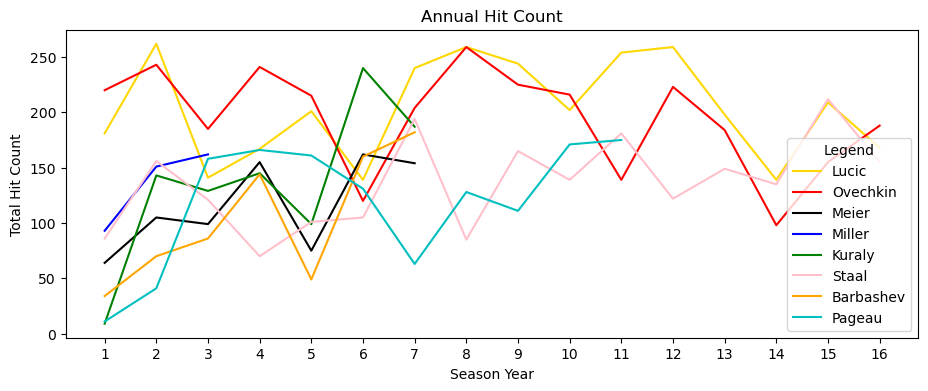

In [273]:
# Define data values - PPG
lucic = hits_df['Lucic']
ovi = hits_df['Ovechkin']
meier = hits_df['Meier']
miller = hits_df['Miller']
kuraly = hits_df['Kuraly']
staal = hits_df['Staal']
barbashev = hits_df['Barbashev']
pageau = hits_df['Pageau']
avg = hits_df['average_hits']
season =  hits_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, lucic, 'gold', label='Lucic')
plt.plot(season, ovi, 'red', label = 'Ovechkin')
plt.plot(season, meier, 'black', label = 'Meier')
plt.plot(season, miller, 'blue', label = 'Miller')
plt.plot(season, kuraly, 'green', label = 'Kuraly')
plt.plot(season, staal, 'pink', label = 'Staal')
plt.plot(season, barbashev, 'orange', label = 'Barbashev')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Lucic', 'Ovechkin', 'Meier', 'Miller', 'Kuraly', 'Staal', 'Barbashev', 'Pageau']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Total Hit Count')
plt.title('Annual Hit Count')
plt.xticks(season, rotation=360)


plt.show()

In [274]:
#joining all of the player goal counts
goals_df = pd.concat([ lucic_df, ovi_df, miller_df, meier_df, pageau_df, kuraly_df, barbashev_df, staal_df ], ignore_index=True)
goals_df = goals_df.pivot(index='season_number', columns='player', values='Goals')
goals_df

player,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
season_number,,,,,,,,
1,5.0,0.0,8.0,3.0,5.0,65.0,2.0,12.0
2,7.0,6.0,17.0,21.0,7.0,56.0,2.0,22.0
3,14.0,8.0,9.0,30.0,9.0,50.0,10.0,21.0
4,11.0,6.0,30.0,22.0,NaN,32.0,19.0,11.0
5,5.0,4.0,26.0,12.0,NaN,38.0,12.0,25.0
6,26.0,14.0,7.0,35.0,NaN,32.0,14.0,10.0
7,16.0,11.0,24.0,40.0,NaN,51.0,4.0,15.0
8,NaN,NaN,18.0,NaN,NaN,53.0,26.0,6.0
9,NaN,NaN,20.0,NaN,NaN,50.0,14.0,20.0


In [275]:
goals_df.reset_index(drop=False, inplace=True)
goals_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
0,1,5.0,0.0,8.0,3.0,5.0,65.0,2.0,12.0
1,2,7.0,6.0,17.0,21.0,7.0,56.0,2.0,22.0
2,3,14.0,8.0,9.0,30.0,9.0,50.0,10.0,21.0
3,4,11.0,6.0,30.0,22.0,NaN,32.0,19.0,11.0
4,5,5.0,4.0,26.0,12.0,NaN,38.0,12.0,25.0
5,6,26.0,14.0,7.0,35.0,NaN,32.0,14.0,10.0
6,7,16.0,11.0,24.0,40.0,NaN,51.0,4.0,15.0
7,8,NaN,NaN,18.0,NaN,NaN,53.0,26.0,6.0
8,9,NaN,NaN,20.0,NaN,NaN,50.0,14.0,20.0
9,10,NaN,NaN,23.0,NaN,NaN,33.0,18.0,16.0


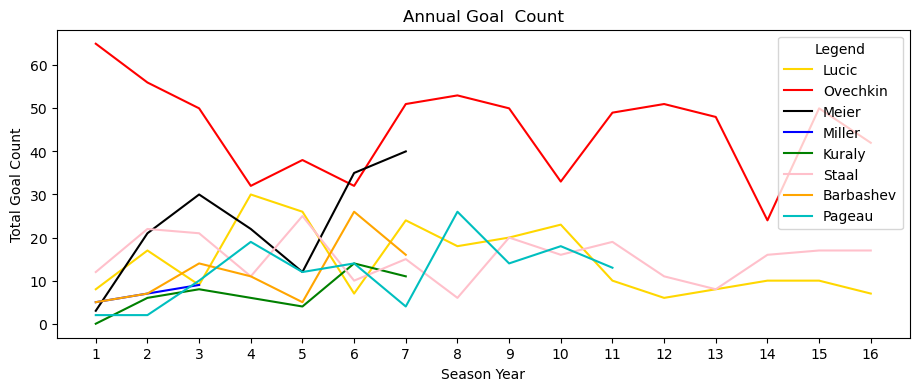

In [276]:
# Define data values - PPG
lucic = goals_df['Lucic']
ovi = goals_df['Ovechkin']
meier = goals_df['Meier']
miller = goals_df['Miller']
kuraly = goals_df['Kuraly']
staal = goals_df['Staal']
barbashev = goals_df['Barbashev']
pageau = goals_df['Pageau']
season =  goals_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, lucic, 'gold', label='Lucic')
plt.plot(season, ovi, 'red', label = 'Ovechkin')
plt.plot(season, meier, 'black', label = 'Meier')
plt.plot(season, miller, 'blue', label = 'Miller')
plt.plot(season, kuraly, 'green', label = 'Kuraly')
plt.plot(season, staal, 'pink', label = 'Staal')
plt.plot(season, barbashev, 'orange', label = 'Barbashev')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Lucic', 'Ovechkin', 'Meier', 'Miller', 'Kuraly', 'Staal', 'Barbashev', 'Pageau']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Total Goal Count')
plt.title('Annual Goal  Count')
plt.xticks(season, rotation=360)


plt.show()

In [277]:
goals_df['total_goals'] = goals_df.iloc[:, 1:9].sum(axis=1, skipna=True)

# Count the non-null values across rows
goals_df['players'] = goals_df.iloc[:, 1:9].count(axis=1)

# Calculate the average sum across rows
goals_df['average_goals'] = round(goals_df['total_goals'] / goals_df['players'], 2)


goals_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal,total_goals,players,average_goals
0,1,5.0,0.0,8.0,3.0,5.0,65.0,2.0,12.0,100.0,8,12.50
1,2,7.0,6.0,17.0,21.0,7.0,56.0,2.0,22.0,138.0,8,17.25
2,3,14.0,8.0,9.0,30.0,9.0,50.0,10.0,21.0,151.0,8,18.88
3,4,11.0,6.0,30.0,22.0,NaN,32.0,19.0,11.0,131.0,7,18.71
4,5,5.0,4.0,26.0,12.0,NaN,38.0,12.0,25.0,122.0,7,17.43
5,6,26.0,14.0,7.0,35.0,NaN,32.0,14.0,10.0,138.0,7,19.71
6,7,16.0,11.0,24.0,40.0,NaN,51.0,4.0,15.0,161.0,7,23.00
7,8,NaN,NaN,18.0,NaN,NaN,53.0,26.0,6.0,103.0,4,25.75
8,9,NaN,NaN,20.0,NaN,NaN,50.0,14.0,20.0,104.0,4,26.00
9,10,NaN,NaN,23.0,NaN,NaN,33.0,18.0,16.0,90.0,4,22.50


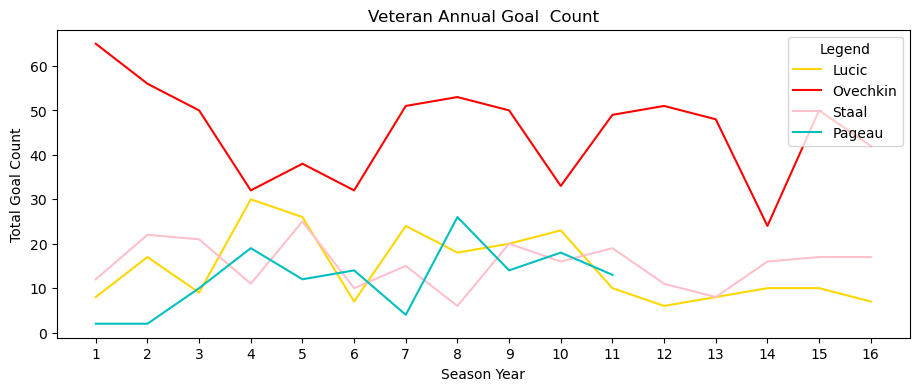

In [278]:
# Define data values - PPG
lucic = goals_df['Lucic']
ovi = goals_df['Ovechkin']
meier = goals_df['Meier']
miller = goals_df['Miller']
kuraly = goals_df['Kuraly']
staal = goals_df['Staal']
barbashev = goals_df['Barbashev']
pageau = goals_df['Pageau']
season =  goals_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, lucic, 'gold', label='Lucic')
plt.plot(season, ovi, 'red', label = 'Ovechkin')
plt.plot(season, staal, 'pink', label = 'Staal')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Lucic', 'Ovechkin', 'Staal', 'Pageau']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Total Goal Count')
plt.title('Veteran Annual Goal  Count')
plt.xticks(season, rotation=360)


plt.show()

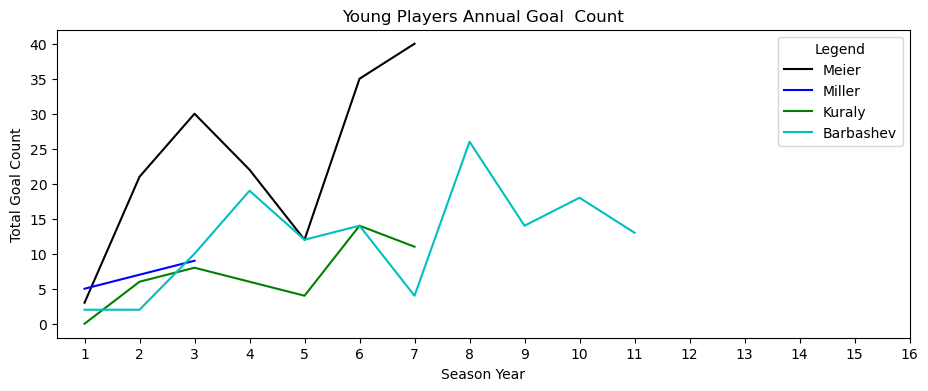

In [279]:
# Define data values - PPG
lucic = goals_df['Lucic']
ovi = goals_df['Ovechkin']
meier = goals_df['Meier']
miller = goals_df['Miller']
kuraly = goals_df['Kuraly']
staal = goals_df['Staal']
barbashev = goals_df['Barbashev']
pageau = goals_df['Pageau']
season =  goals_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, meier, 'black', label = 'Meier')
plt.plot(season, miller, 'blue', label = 'Miller')
plt.plot(season, kuraly, 'green', label = 'Kuraly')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Meier', 'Miller', 'Kuraly', 'Barbashev']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Total Goal Count')
plt.title('Young Players Annual Goal  Count')
plt.xticks(season, rotation=360)


plt.show()

In [284]:
#joining all of the player ppg counts
pims_df = pd.concat([ lucic_df, ovi_df, miller_df, meier_df, pageau_df, kuraly_df, barbashev_df, staal_df ], ignore_index=True)
pims_df = pims_df.pivot(index='season_number', columns='player', values='ppg')
pims_df

player,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
season_number,,,,,,,,
1,0.03,0.12,0.31,0.15,0.17,0.24,0.00,0.32
2,0.04,0.23,0.57,0.25,0.15,0.43,0.21,0.21
3,0.09,0.23,0.30,0.32,0.22,0.39,0.06,0.27
4,0.14,0.19,0.46,0.24,NaN,0.23,0.11,0.19
5,0.08,0.21,0.49,0.20,NaN,0.17,0.15,0.27
6,0.23,0.32,0.46,0.35,NaN,0.38,0.23,0.33
7,0.21,0.37,0.34,0.26,NaN,0.31,0.08,0.21
8,NaN,NaN,0.30,NaN,NaN,0.36,0.18,0.15
9,NaN,NaN,0.33,NaN,NaN,0.32,0.09,0.21


In [285]:
pims_df.reset_index(drop=False, inplace=True)
pims_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
0,1,0.03,0.12,0.31,0.15,0.17,0.24,0.00,0.32
1,2,0.04,0.23,0.57,0.25,0.15,0.43,0.21,0.21
2,3,0.09,0.23,0.30,0.32,0.22,0.39,0.06,0.27
3,4,0.14,0.19,0.46,0.24,NaN,0.23,0.11,0.19
4,5,0.08,0.21,0.49,0.20,NaN,0.17,0.15,0.27
5,6,0.23,0.32,0.46,0.35,NaN,0.38,0.23,0.33
6,7,0.21,0.37,0.34,0.26,NaN,0.31,0.08,0.21
7,8,NaN,NaN,0.30,NaN,NaN,0.36,0.18,0.15
8,9,NaN,NaN,0.33,NaN,NaN,0.32,0.09,0.21
9,10,NaN,NaN,0.20,NaN,NaN,0.30,0.16,0.21


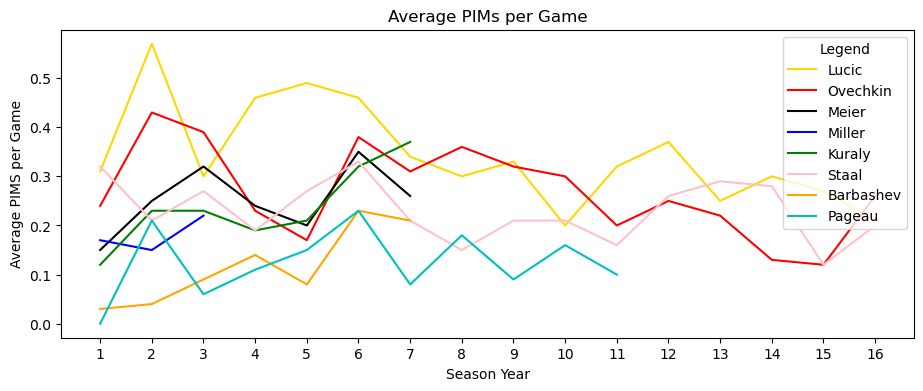

In [297]:
# Define data values - PPG
lucic = pims_df['Lucic']
ovi = pims_df['Ovechkin']
meier = pims_df['Meier']
miller = pims_df['Miller']
kuraly = pims_df['Kuraly']
staal = pims_df['Staal']
barbashev = pims_df['Barbashev']
pageau = pims_df['Pageau']
season =  pims_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, lucic, 'gold', label='Lucic')
plt.plot(season, ovi, 'red', label = 'Ovechkin')
plt.plot(season, meier, 'black', label = 'Meier')
plt.plot(season, miller, 'blue', label = 'Miller')
plt.plot(season, kuraly, 'green', label = 'Kuraly')
plt.plot(season, staal, 'pink', label = 'Staal')
plt.plot(season, barbashev, 'orange', label = 'Barbashev')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Lucic', 'Ovechkin', 'Meier', 'Miller', 'Kuraly', 'Staal', 'Barbashev', 'Pageau']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Average Penalties per Game')
plt.title('Average PIMs per Game')
plt.xticks(season, rotation=360)


plt.show()

In [300]:
#taking a look at the total penalties 
pims2_df = pd.concat([ lucic_df, ovi_df, miller_df, meier_df, pageau_df, kuraly_df, barbashev_df, staal_df ], ignore_index=True)
pims2_df = pims2_df.pivot(index='season_number', columns='player', values='Total Penalties')
pims2_df

player,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
season_number,,,,,,,,
1,1.0,1.0,24.0,5.0,9.0,20.0,0.0,26.0
2,2.0,17.0,41.0,20.0,12.0,34.0,6.0,17.0
3,7.0,16.0,15.0,25.0,17.0,28.0,3.0,22.0
4,10.0,13.0,36.0,17.0,NaN,18.0,9.0,8.0
5,3.0,10.0,40.0,11.0,NaN,13.0,12.0,17.0
6,19.0,25.0,21.0,27.0,NaN,18.0,18.0,16.0
7,17.0,26.0,27.0,20.0,NaN,24.0,3.0,17.0
8,NaN,NaN,24.0,NaN,NaN,29.0,12.0,7.0
9,NaN,NaN,27.0,NaN,NaN,25.0,5.0,17.0


In [301]:
pims2_df.reset_index(drop=False, inplace=True)
pims2_df

player,season_number,Barbashev,Kuraly,Lucic,Meier,Miller,Ovechkin,Pageau,Staal
0,1,1.0,1.0,24.0,5.0,9.0,20.0,0.0,26.0
1,2,2.0,17.0,41.0,20.0,12.0,34.0,6.0,17.0
2,3,7.0,16.0,15.0,25.0,17.0,28.0,3.0,22.0
3,4,10.0,13.0,36.0,17.0,NaN,18.0,9.0,8.0
4,5,3.0,10.0,40.0,11.0,NaN,13.0,12.0,17.0
5,6,19.0,25.0,21.0,27.0,NaN,18.0,18.0,16.0
6,7,17.0,26.0,27.0,20.0,NaN,24.0,3.0,17.0
7,8,NaN,NaN,24.0,NaN,NaN,29.0,12.0,7.0
8,9,NaN,NaN,27.0,NaN,NaN,25.0,5.0,17.0
9,10,NaN,NaN,16.0,NaN,NaN,25.0,12.0,16.0


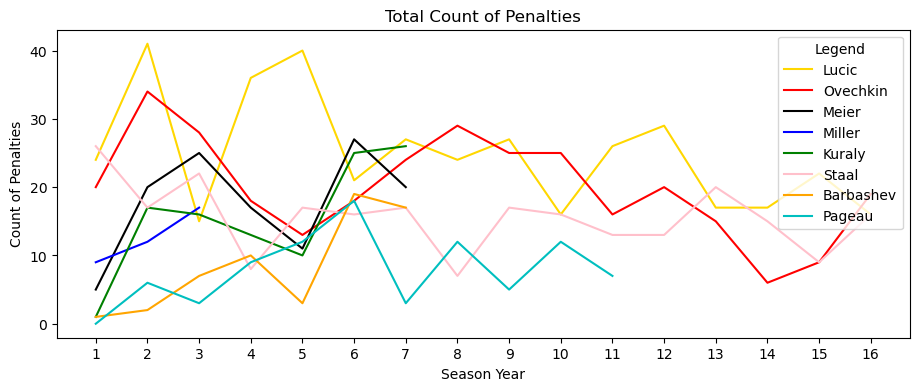

In [302]:
# Define data values - PPG
lucic = pims2_df['Lucic']
ovi = pims2_df['Ovechkin']
meier = pims2_df['Meier']
miller = pims2_df['Miller']
kuraly = pims2_df['Kuraly']
staal = pims2_df['Staal']
barbashev = pims2_df['Barbashev']
pageau = pims2_df['Pageau']
season =  pims2_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, lucic, 'gold', label='Lucic')
plt.plot(season, ovi, 'red', label = 'Ovechkin')
plt.plot(season, meier, 'black', label = 'Meier')
plt.plot(season, miller, 'blue', label = 'Miller')
plt.plot(season, kuraly, 'green', label = 'Kuraly')
plt.plot(season, staal, 'pink', label = 'Staal')
plt.plot(season, barbashev, 'orange', label = 'Barbashev')
plt.plot(season, pageau, 'c', label = 'Pageau')

# Set legend and title
legend_labels = [ 'Lucic', 'Ovechkin', 'Meier', 'Miller', 'Kuraly', 'Staal', 'Barbashev', 'Pageau']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Count of Penalties')
plt.title('Total Count of Penalties')
plt.xticks(season, rotation=360)


plt.show()

In [288]:
meier_df

,index,Season,Hits,Goals,Total Penalties,Minor,Major,Misconduct,player,ppg,season_number
0,0,2016,64,3,5,5,0,0,Meier,0.15,1
1,1,2017,105,21,20,18,1,1,Meier,0.25,2
2,2,2018,99,30,25,24,1,0,Meier,0.32,3
3,3,2019,155,22,17,16,0,1,Meier,0.24,4
4,4,2020,75,12,11,11,0,0,Meier,0.20,5
5,5,2021,162,35,27,27,0,0,Meier,0.35,6
6,6,2022,154,40,20,19,1,0,Meier,0.26,7


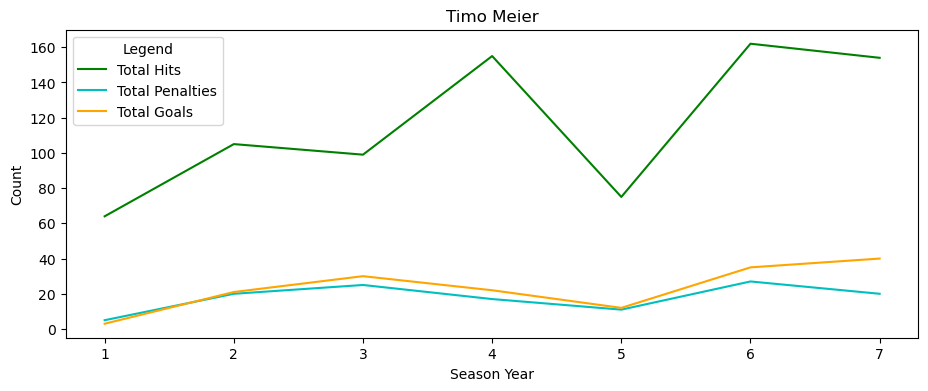

In [296]:
# Define data values - PPG
hits = meier_df['Hits']
pims = meier_df['Total Penalties']
goals = meier_df['Goals']
season =  meier_df['season_number']

# Create the first y-axis for 'TOI'
fig, ax1 = plt.subplots(figsize=(11, 4))  # Adjust the figsize as needed


# Plot 'TOI' on the first y-axis
plt.plot(season, hits, 'green', label='Total Hits')
plt.plot(season, pims, 'c', label = 'Total PIMs')
plt.plot(season, goals, 'orange', label = 'Total Goals')

# Set legend and title
legend_labels = [ 'Total Hits', 'Total Penalties', 'Total Goals']
plt.legend(legend_labels, title='Legend');
plt.xlabel('Season Year')
plt.ylabel('Count')
plt.title('Timo Meier')
plt.xticks(season, rotation=360)


plt.show()